# Step 1: Let's import the libraries first

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

# Step 2: Calculate probabilties for logits

Let's initialize the output provided by the linear layer with the variable `logits`, which is the output provided by the linear layer

In [2]:
logits = np.array([1.5, 2, 2.5, 3.5, 4])

Previously, we directly passed the logits to softmax. But now, we will first divide the logits by the temperature. Let's take temperatue value 0.5

In [3]:
temp = 0.5
scores = logits/temp
print("The new scores are:", scores)

The new scores are: [3. 4. 5. 7. 8.]


Now, let's define a function to calculate softmax.

In [4]:
def softmax(values):
    num = np.exp(values)
    return np.array(num/sum(num))

Pass the new scores by softmax function to calculate probability.

In [5]:
prob = softmax(scores)
print("The output probabilites are:", prob)

The output probabilites are: [0.00467031 0.01269521 0.03450917 0.25499017 0.69313514]


Let's implement a function to plot bar graph of logits and these probabilites to understand the difference

In [6]:
def bar(arr1, arr2):
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    index = np.array(range(0,len(arr1)))
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    
    plt.subplot(1, 2, 1)  # Create 1x2 grid of subplots, activate the first subplot
    plt.bar(index, arr1, color='b', align='center')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of Original array')

    # Plotting arr2 in the second subplot
    plt.subplot(1, 2, 2)  # Activate the second subplot
    plt.bar(index, arr2, color='g', align='center')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of Softmax Array')

    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()

    # Show plots
    plt.show()

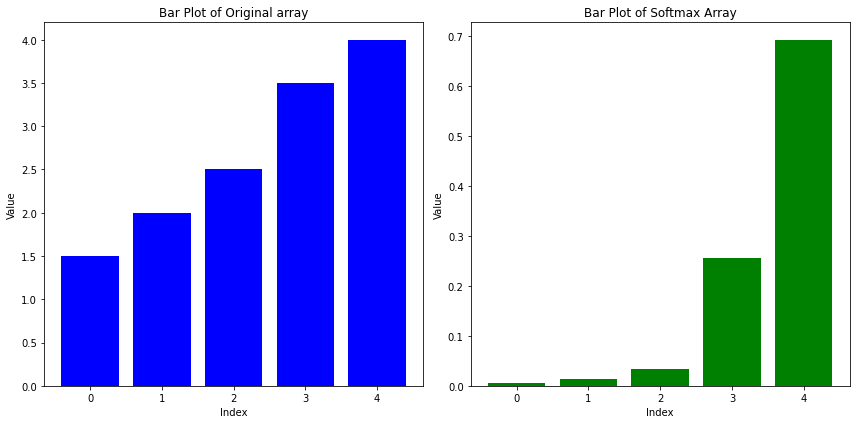

In [7]:
bar(logits, prob)

### The above was for the temperature 1. Let's see how it performs for different values of temperature

To play around, let's define a function that takes logits and temperature as input, performs all the task we performed above and returns softmax values.

In [8]:
def choose_word(logits, temp):
    #Base conditions for temperature
    temp = max(temp, 0.005)
    if temp > 1:
        return "Error"
    
    scores = logits/temp
    prob = softmax(scores)
    return prob

### For temperature = 0.7

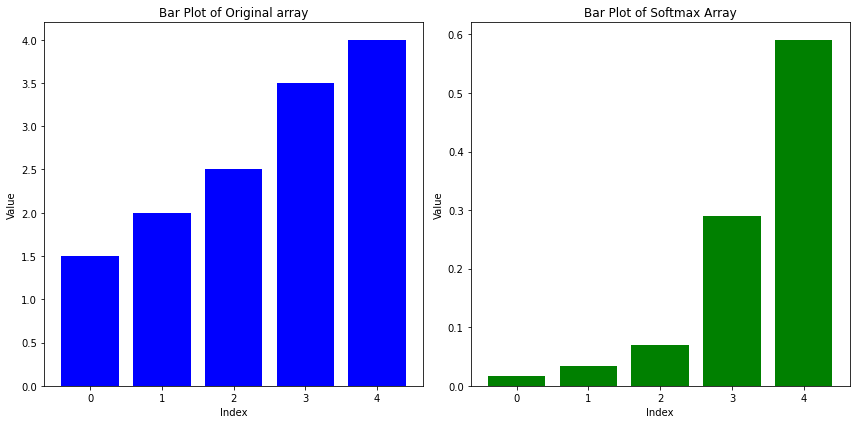

In [9]:
bar(logits, choose_word(logits, 0.7))

### For temperature = 0.4

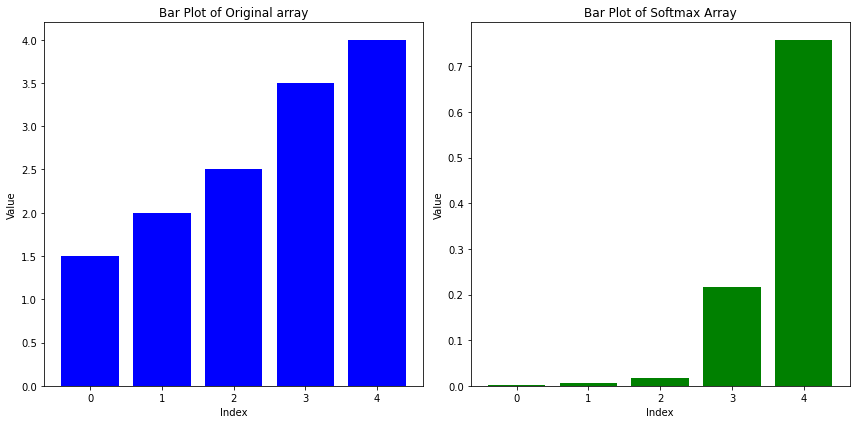

In [10]:
bar(logits, choose_word(logits, 0.4))

### For temperature = 0.1

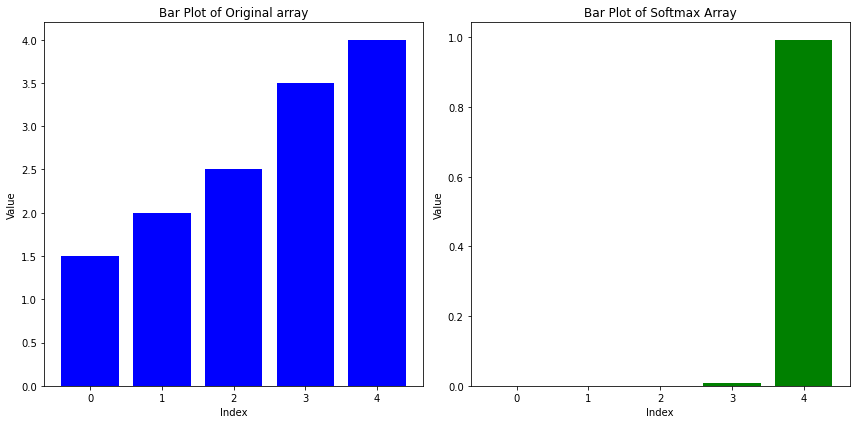

In [11]:
bar(logits, choose_word(logits, 0.1))

Now, we have these probabilites. Let's perform a cumulative sum (cumulative distribution) on an array of probabilities

# Step 3: Choosing the word

## Understanding Cumulative Distribution:

Imagine we have a list of probabilities for different words the model can output.

These probabilities are like chances assigned to each word.

A cumulative distribution is a way to arrange these probabilities in order, where each word's probability is added to the probabilities before it.

This creates a continuous range from 0 to 1, where each word's range of probabilities doesn't overlap but adds up to 1 at the end.

Imagine we have three words with probabilities:

1. Word A: 0.2
2. Word B: 0.3
3. Word C: 0.5

Cumulative probabilities would be:

Word A: 0.2

Word B: 0.5 (0.2 + 0.3)

Word C: 1.0 (0.2 + 0.3 + 0.5)

## Generate a random number

To pick a word fairly based on its probability:

1. Generate a random number between 0 and 1.
2. Look at the cumulative distribution: it shows the probability of picking each word up to that point.
3. The random number falls into one of these ranges, and you pick the corresponding word.

#### This method ensures that words with higher probabilities are more likely to be chosen, but it still allows for variety because of the randomness.

For the above example of cumulative probabilties: 

Word A: 0.2

Word B: 0.5 (0.2 + 0.3)

Word C: 1.0 (0.2 + 0.3 + 0.5)

Generate a random number, say 0.4.

0.4 falls between 0.2 and 0.5, so Word B would be chosen in this example.


### Why It Works:
#### Avoiding Repetition:
1. By using cumulative distribution, you ensure that the model doesn't always pick the word with the highest probability.
2. Even if a word has a high probability, other words still have a chance to be picked, depending on the random number generated.

#### Encouraging Diversity:
1. This approach encourages the model to produce varied outputs over many samples.
2. It balances between picking high-probability words and exploring other possibilities, which makes the text generated more interesting and diverse.

Let's implement a function to perform these tasks:

In [12]:
def get_random_word(prob):
    cumu_prob = prob.copy()
    for ind in range(1,len(prob)):
        cumu_prob[ind] += cumu_prob[ind-1]
    rand = random.random()
    for ind,val in enumerate(cumu_prob):
        if rand < val:
            return ind

Now, let's write a wrapper function to wrap both the functions we implemented

In [13]:
def predict_next_word(logits, temp):
    prob = choose_word(logits, temp)
    element = get_random_word(prob)
    return element

Let's see how the model distributes its predictions across the vocabulary

Let's write visualization function

In [14]:
def multi_bar(arr1, arr2, arr3, arr4):
    index = np.array(range(0,len(arr1)))
    plt.figure(figsize=(10, 10))  # Adjust figure size as needed
    
    plt.subplot(2, 2, 1)
    plt.bar(index, arr1, color='b', align='center')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of Logits')

    plt.subplot(2, 2, 2)  # Activate the second subplot
    plt.bar(index, arr2, color='y', align='center')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of Softmax Array')
    
    plt.subplot(2, 2, 3)  # Activate the second subplot
    plt.bar(index, arr3, color='g', align='center')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of Softmax Array divided by Temp')
    
    plt.subplot(2, 2, 4)  # Activate the second subplot
    plt.bar(index, arr4, color='r', align='center')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Bar Plot of Cumulative distribution array')


    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()

    # Show plots
    plt.show()

We will predict the word 10000 times and observe the words chosen each time. 

Count of word chosen each time: [ 201.  484. 1417. 2614. 5284.]
Probability of each word chosen: [0.0201 0.0484 0.1417 0.2614 0.5284]


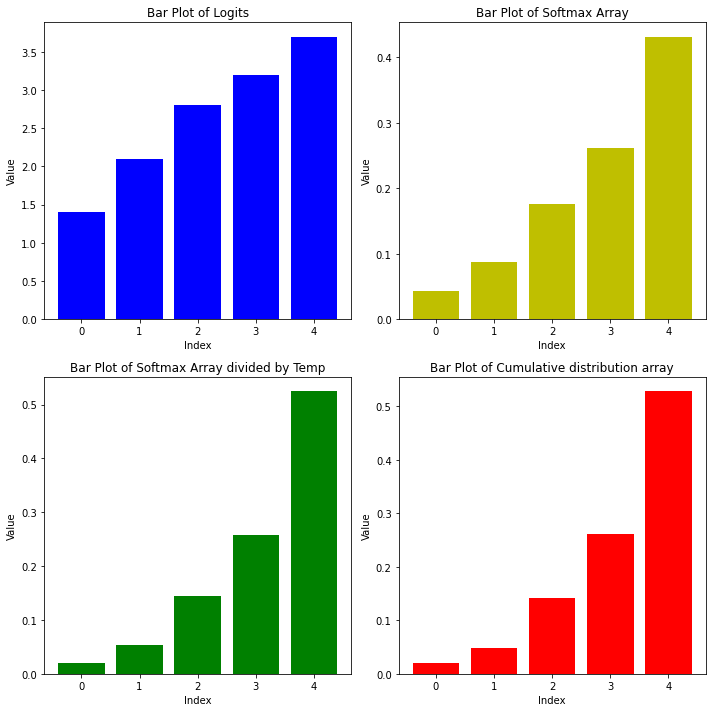

In [15]:
logits = np.array(sorted([1.4, 2.1, 2.8, 3.2, 3.7]))
temp = 0.7
count = np.zeros(len(scores)) #This will store the count of how many times each word (index) is selected.

for i in range(10000):
    count[predict_next_word(logits, temp)] += 1

new_prob = count/sum(count)
print("Count of word chosen each time:", count)
print("Probability of each word chosen:", new_prob)
prob_softmax_without_temp = softmax(logits)
prob_softmax_with_temp = choose_word(logits, temp)

multi_bar(logits, prob_softmax_without_temp, prob_softmax_with_temp, new_prob)